<a href="https://colab.research.google.com/github/anisha99999/DNNs/blob/master/Assignment7_cutout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, Input, DepthwiseConv2D, Concatenate,Reshape
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils,plot_model
from keras import layers, models
from matplotlib import pyplot
from keras.utils import plot_model
import pandas as pd
import os
import cv2
from keras.preprocessing.image import img_to_array

import warnings
warnings.filterwarnings('ignore')

In [14]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
(features, labels), (tst_features, tst_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (train_features.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(train_features[1])
print(type(train_features))
train_features.shape
len(train_labels)

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


50000

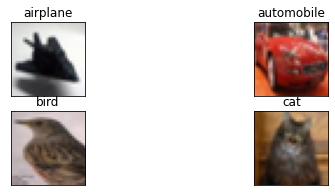

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
#for i in range(num_classes):
for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    #img_num = np.random.randint(features_idx.shape[0])
    
    im = features_idx[i]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, padding='same',input_shape=(32, 32, 3))) #32x32x48
model.add(Activation('relu'))
model.add(Convolution2D(48, 3)) #30x30x48
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #15x15x48
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, padding='same')) #15x15x96
model.add(Activation('relu'))
model.add(Convolution2D(96, 3,)) #13x13x96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, padding='same')) #6x6x192
model.add(Activation('relu'))
#model.add(Convolution2D(192, 3, 3)) 
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #3x3x192
model.add(Dropout(0.25))

#model.add(Convolution2D(192, 3, 3, padding='same')) #3x3x192
#model.add(Activation('relu'))
model.add(Convolution2D(192, 3)) #1x1x192
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(512, 1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Convolution2D(256, 1))
#model.add(Activation('relu'))
model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        4

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        4

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
#                                 validation_data = (test_features, test_labels), verbose=1)

model_info = model.fit(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = None, epochs = 1, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
#plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

391/391 [==============================] - 8s 20ms/step - loss: 1.8465 - accuracy: 0.2976 - val_loss: 1.4391 - val_accuracy: 0.4732
Model took 15.58 seconds to train
Accuracy on test data is: 47.32


In [10]:
# Function to reandomly erase from image

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
#                                 validation_data = (test_features, test_labels), verbose=1)

model_info = model.fit(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = None, epochs = 1, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
#plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


391/391 [==============================] - 7s 19ms/step - loss: 1.3726 - accuracy: 0.5030 - val_loss: 1.1639 - val_accuracy: 0.5879
Model took 7.49 seconds to train
Accuracy on test data is: 58.79


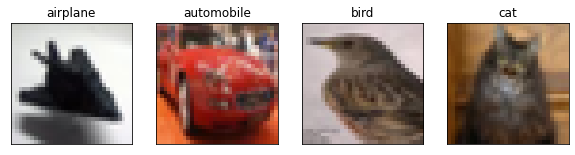

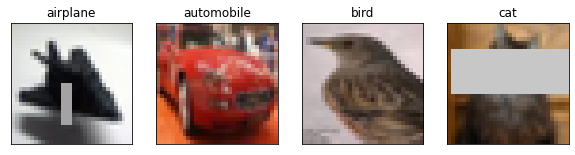

In [31]:
# Function called to cutout from train-set data 
eraser = get_random_eraser()
fig = plt.figure(figsize=(10,4))
for i in range(4):
    ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
    idx = np.where(labels[:]==i)[0]
    features_idx = features[idx,::]
    im = features_idx[i]
    ax.set_title(class_names[i])
    plt.imshow(im, interpolation="nearest")
plt.show()

fig = plt.figure(figsize=(10,4))
for i in range(4):
    ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
    idx = np.where(labels[:]==i)[0]
    features_idx = features[idx,::]
    im = features_idx[i]
    ax.set_title(class_names[i])
    plt.imshow(eraser(im), interpolation="nearest")
plt.show()
